In [248]:
import numpy as np 
import pandas as pd

In [249]:
# !wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

In [250]:
df = pd.read_csv('housing.csv')

In [251]:
df = df[['latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value']]

In [252]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,20630,20631,20632,20633,20634,20635,20636,20637,20638,20639
latitude,37.8800,37.8600,37.8500,37.8500,37.8500,37.8500,37.8400,37.84,37.8400,37.8400,...,39.2900,39.3300,39.260,39.1900,39.2700,39.4800,39.4900,39.43,39.4300,39.3700
longitude,-122.2300,-122.2200,-122.2400,-122.2500,-122.2500,-122.2500,-122.2500,-122.25,-122.2600,-122.2500,...,-121.3200,-121.4000,-121.450,-121.5300,-121.5600,-121.0900,-121.2100,-121.22,-121.3200,-121.2400
housing_median_age,41.0000,21.0000,52.0000,52.0000,52.0000,52.0000,52.0000,52.00,42.0000,52.0000,...,11.0000,15.0000,15.000,27.0000,28.0000,25.0000,18.0000,17.00,18.0000,16.0000
total_rooms,880.0000,7099.0000,1467.0000,1274.0000,1627.0000,919.0000,2535.0000,3104.00,2555.0000,3549.0000,...,2640.0000,2655.0000,2319.000,2080.0000,2332.0000,1665.0000,697.0000,2254.00,1860.0000,2785.0000
total_bedrooms,129.0000,1106.0000,190.0000,235.0000,280.0000,213.0000,489.0000,687.00,665.0000,707.0000,...,505.0000,493.0000,416.000,412.0000,395.0000,374.0000,150.0000,485.00,409.0000,616.0000
population,322.0000,2401.0000,496.0000,558.0000,565.0000,413.0000,1094.0000,1157.00,1206.0000,1551.0000,...,1257.0000,1200.0000,1047.000,1082.0000,1041.0000,845.0000,356.0000,1007.00,741.0000,1387.0000
households,126.0000,1138.0000,177.0000,219.0000,259.0000,193.0000,514.0000,647.00,595.0000,714.0000,...,445.0000,432.0000,385.000,382.0000,344.0000,330.0000,114.0000,433.00,349.0000,530.0000
median_income,8.3252,8.3014,7.2574,5.6431,3.8462,4.0368,3.6591,3.12,2.0804,3.6912,...,3.5673,3.5179,3.125,2.5495,3.7125,1.5603,2.5568,1.70,1.8672,2.3886
median_house_value,452600.0000,358500.0000,352100.0000,341300.0000,342200.0000,269700.0000,299200.0000,241400.00,226700.0000,261100.0000,...,112000.0000,107200.0000,115600.000,98300.0000,116800.0000,78100.0000,77100.0000,92300.00,84700.0000,89400.0000


In [253]:
#DAta is already clean so let's do some EDA

In [254]:
import matplotlib as plt 
import seaborn as sns 

<Axes: xlabel='median_house_value', ylabel='Count'>

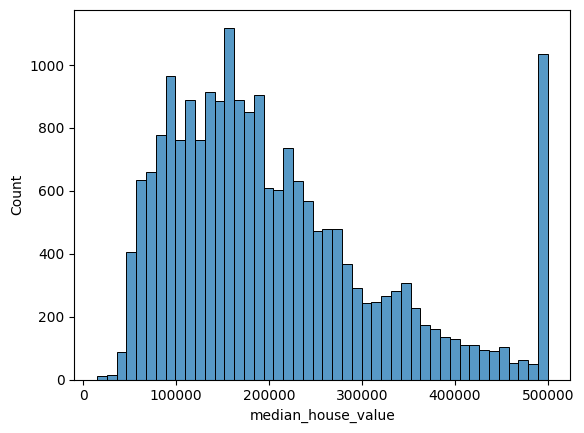

In [255]:
sns.histplot(df.median_house_value)

In [256]:
df.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [257]:
# Find a feature with missing values. How many missing values does it have?
# 207 

In [258]:
df.population.median()

1166.0

In [259]:
df.population.describe()

count    20640.000000
mean      1425.476744
std       1132.462122
min          3.000000
25%        787.000000
50%       1166.000000
75%       1725.000000
max      35682.000000
Name: population, dtype: float64

In [260]:
# What's the median (50% percentile) for variable 'population'?
# 1166.0

In [261]:
# Setting up framework 
np.random.seed(42)
n = len(df)
n_val =  int( 0.2 * n)
n_test =  int(0.2 * n )
n_train = n - n_val - n_test

In [262]:
n,n_val,n_test,n_train

(20640, 4128, 4128, 12384)

In [263]:
idx = np.arange(n)

In [264]:
np.random.shuffle(idx)

In [265]:
df_shuffled = df.iloc[idx]

In [266]:
df_train = df_shuffled.iloc[:n_train]
df_val = df_shuffled.iloc[n_train: n_train + n_val ] 
df_test = df_shuffled.iloc[n_train+n_val:]

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [267]:
y_train_orig = df_train.median_house_value.values
y_val_orig = df_val.median_house_value.values
y_test_orig = df_test.median_house_value.values

In [268]:
y_train = np.log1p(y_train_orig)
y_val = np.log1p(y_val_orig)
y_test = np.log1p(y_test_orig)

In [269]:
del df_test['median_house_value']
del df_train['median_house_value']
del df_val['median_house_value']

In [270]:
#simple linear regression 

def train_linear_regression(X,y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [271]:
# preparing the dataset 

check=["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", 
       "population", "households", "median_income"]

def prepare_X(df, fillna_values):
    df_num = df[check]
    df_num = df.fillna(fillna_values)
    X = df_num.values
    return X

In [272]:
#@ FUNCTION FOR RMSE VALUES:

def rmse(y_pred, y_val):
    e = y_pred - y_val
    se = e ** 2 
    mse = se.mean()
    rmse = np.sqrt(mse)
    return rmse

In [273]:
X = prepare_X(df_train, 0)
w0, w = train_linear_regression(X, y_train)

X = prepare_X(df_val,0)
y_pred = w0 + X.dot(w)

rmse(y_pred, y_val).round(2)

0.33

In [274]:
mean = df_train.total_bedrooms.mean()

X = prepare_X(df_train, mean)
w0, w = train_linear_regression(X, y_train)

X = prepare_X(df_val, mean)
y_pred = w0 + X.dot(w)

rmse(y_pred, y_val).round(2)

0.33

In [275]:
# Q3 : So both are same 

In [276]:
#simple linear regression 

def train_linear_regression_r(X,y,r=0.1):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX = XTX  + np.eye(XTX.shape[0]) * r 
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [277]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    X = prepare_X(df_train, 0)
    w0, w = train_linear_regression_r(X, y_train, r)

    X = prepare_X(df_val,0)
    y_pred = w0 + X.dot(w)

    print(f"r:: {r}, {rmse(y_pred, y_val).round(2)}")
    

r:: 0, 0.33
r:: 1e-06, 0.33
r:: 0.0001, 0.33
r:: 0.001, 0.33
r:: 0.01, 0.33
r:: 0.1, 0.33
r:: 1, 0.33
r:: 5, 0.34
r:: 10, 0.34


In [278]:
# //Question 4 r = 0 

In [285]:
rmse_res = []
for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    np.random.seed(seed)
    idx = np.arange(n)
    np.random.shuffle(idx)
    
    df_shuffled = df.iloc[idx]
    
    df_train = df_shuffled.iloc[:n_train]
    df_val = df_shuffled.iloc[n_train: n_train + n_val ] 
    df_test = df_shuffled.iloc[n_train+n_val:]

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    y_train_orig = df_train.median_house_value
    y_val_orig = df_val.median_house_value
    y_test_orig = df_test.median_house_value
    
    y_train = np.log1p(y_train_orig)
    y_val = np.log1p(y_val_orig)
    y_test = np.log1p(y_test_orig)
    
    del df_test['median_house_value']
    del df_train['median_house_value']
    del df_val['median_house_value']
    
    
    X = prepare_X(df_train, 0)
    w0, w = train_linear_regression(X, y_train)

    X = prepare_X(df_val,0)
    y_pred = w0 + X.dot(w)

    res = rmse(y_pred, y_val).round(2)
    rmse_res.append(res)
    print(f"seed:: {seed}, rmse:: {res}")

seed:: 0, rmse:: 0.34
seed:: 1, rmse:: 0.34
seed:: 2, rmse:: 0.33
seed:: 3, rmse:: 0.34
seed:: 4, rmse:: 0.34
seed:: 5, rmse:: 0.34
seed:: 6, rmse:: 0.35
seed:: 7, rmse:: 0.34
seed:: 8, rmse:: 0.35
seed:: 9, rmse:: 0.34


In [286]:
np.std(rmse_res)

0.005385164807134491

In [281]:

#@ INITIALIZING SEED AND REGULARIZATION:
r = 9

idx = np.arange(n)
np.random.seed(r)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]
    
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

frames = [df_train, df_val]
df_train_val = pd.concat(frames)

df_train_val = df_train_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train_val_orig = df_train_val.median_house_value.values
y_test_orig = df_test.median_house_value.values

y_train_val = np.log1p(y_train_val_orig)
y_test = np.log1p(y_test_orig)

del df_train_val['median_house_value']
del df_test['median_house_value']

In [282]:

#@ INSPECTING RMSE:
X_null_train_val = prepare_X(df_train_val, 0)
w_0_train_val, w_train_val = train_linear_regression_r(X_null_train_val, y_train_val, r=0.001)

X_null_test = prepare_X(df_test, 0)
y_null_pred_test = w_0_train_val + X_null_test.dot(w_train_val)

np.round(rmse(y_test, y_null_pred_test),2)

0.35